# __MOVIE RECOMMENDER SYSTEM__

### __INTRODUCTION__
In this exciting study, we explore the field of movie recommendations by utilizing the MovieLens dataset from the University of Minnesota's GroupLens research lab. The primary objective of our project is to create an advanced model that uses user ratings of previous films to suggest the top 5 movies to consumers. Throughout this presentation, we invite you to immerse yourself in the world of movie recommendations. We'll walk you through our model's intricacies, key findings, and demonstrate its prowess in suggesting movies tailored to individual tastes.

### __PROJECT OVERVIEW__
### __Business Understanding__
Movie Recommender Systems have evolved significantly over the years, playing a crucial role in enhancing user experience and driving business growth in the entertainment industry. Recommender systems date back to the late 20th century. In the early days, collaborative filtering was a prominent technique in which systems analyzed user behaviors and preferences to make recommendations. However, scalability and the cold-start problem (new items or users with limited data) were challenges. Content-based filtering emerged as an approach that considered item features and user preferences. Hybrid models, combining collaborative and content-based methods, gained popularity. Companies started integrating metadata like genre, director, and actor information to enhance recommendations.

Streaming platforms, such as Netflix, Hulu, and Amazon Prime Video, heavily rely on recommender systems. Personalization became a key business strategy, offering users tailored content suggestions based on their viewing history, ratings, and implicit feedback. While recommender systems offer numerous benefits, they also face challenges, including issues of bias, diversity, and privacy. Ensuring fair and unbiased recommendations has become a critical aspect of system development. The landscape continues to evolve with ongoing research in reinforcement learning, contextual recommendations, and explainability. Companies invest in AI research and development to stay competitive and enhance the overall user experience.

This movie recommendation system is designed to benefit the following stakeholders:

- Users: Movie enthusiasts seeking personalized movie suggestions based on their preferences and viewing history.
- Streaming Platform: The platform hosting the movie recommendation system, aiming to enhance user satisfaction and engagement.
- Content Providers: Movie studios and content creators interested in understanding user preferences and trends to optimize their content offerings.

### __Problem Statement__
Current systems frequently struggle with inadequate personalization, providing generic recommendations that do not correspond with the tastes of specific users. This gap leads to user annoyance and diminished engagement, diminishing the potential for streaming platforms to increase user pleasure. Second, because there is a widespread issue with cold starts, the algorithm performs poorly when it comes to new users or movies because there is insufficient history data to make initial recommendations accurately. It is critical to address these problems in order to create a recommendation system that appeals to consumers, changes with their tastes, and offers a varied and interesting viewing experience.

### __Objectives__
Build a model that provides top 5 movie recommendations to a user, based on their ratings of other movies.

### __DATA UNDERSTANDING__
The dataset (ml-latest-small) consists of 100,836 ratings and 3,683 tag applications across 9,742 movies. The data were generated by 610 users between March 29, 1996, and September 24, 2018.
The data used in this project will be pulled from 4 different separate file:

*1. Movies Data (movies.csv):*
Contains movie information, including titles and genres with the following columns:
 * movieId: Unique identifier for each movie.
 * title: The title of the movie, which also includes the year of release in parentheses.
 * genres: A pipe-separated list of genres to categorize the movie (e.g., Action|Adventure|Comedy).

*2. Links Data (links.csv):*
Provides identifiers for linking to external movie-related sources (IMDb, TMDb) and has the followinf columns:
* movieId: Unique identifier for each movie, consistent with other data files.
* imdbId: Identifier for movies used by IMDb (Internet Movie Database).
* tmdbId: Identifier for movies used by TMDb (The Movie Database).

*3. Ratings Data (ratings.csv):*
Contains user ratings on a 5-star scale for movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* rating: User's rating for the movie on a 5-star scale with half-star increments (0.5 to 5.0).
* timestamp: The timestamp when the rating was recorded, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

*4. Tags Data (tags.csv):*
Contains user-generated metadata (tags) about movies and has the following columns:
* userId: ID representing the unique identifier for each user.
* movieId: Unique identifier for each movie.
* tag: User-generated metadata describing a movie, typically a single word or short phrase.
* timestamp: The timestamp when the tag was applied, represented in seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

In [1]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



We will exclusively utilize the `movies.csv` dataset and the `ratings.csv` dataset for our analysis, as these two datasets encompass the necessary columns and information required for our project.

In [2]:
# A function to load, merge and give data summary
def load_and_examine(file_path_1, file_path_2):
    try:
        #Load the data
        df1 = pd.read_csv(file_path_1)
        df2 = pd.read_csv(file_path_2)
        data = pd.merge(df1, df2, on = "movieId" )
        
        #Display the shape, columns and first five rows of the dataset
        print("-" * 50, "Dataset Shape", "-" * 50)
        display(data.shape)
        print("-" * 50, "Dataset Columns", "-" * 50)
        display(data.columns)
        print("-" * 50, "Dataset Head", "-" * 50)
        display(data.head())
        
        #Display information about the dataset
        print("-" * 50, "Dataset Information", "-" * 50)
        display(data.info())

        return data
 
 
    except FileNotFoundError:
        print(f"File '{file_path_1}, {file_path_2}' not found.")
    except Exception as e:
        print(f"An error occurred: {e}")
file_path_1 = "data/movies.csv"
file_path_2 = "data/ratings.csv"
data = load_and_examine(file_path_1, file_path_2)


-------------------------------------------------- Dataset Shape --------------------------------------------------


(100836, 6)

-------------------------------------------------- Dataset Columns --------------------------------------------------


Index(['movieId', 'title', 'genres', 'userId', 'rating', 'timestamp'], dtype='object')

-------------------------------------------------- Dataset Head --------------------------------------------------


,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


-------------------------------------------------- Dataset Information --------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   movieId    100836 non-null  int64  
 1   title      100836 non-null  object 
 2   genres     100836 non-null  object 
 3   userId     100836 non-null  int64  
 4   rating     100836 non-null  float64
 5   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


None

### __DATA PREPARATION__

### __Dropping Irrelevant Features__

In [3]:
# # Dropping the "timestamp" column
# data = data.drop("timestamp", axis = 1)
# data.head()

### __Missing Values__

In [4]:
# Checking for missing values in each column
missing_values = data.isna().sum()

for column, count in missing_values.items():
    print(f"The {column} column has {count} missing values")

The movieId column has 0 missing values
The title column has 0 missing values
The genres column has 0 missing values
The userId column has 0 missing values
The rating column has 0 missing values
The timestamp column has 0 missing values


From the cell above, our dataset has no missing values.

### __Duplicate Values__

In [5]:
# Checking for duplicated rows
duplicated_rows = data.duplicated().sum()
print(f'The DataFrame has {duplicated_rows} duplicated rows.')

The DataFrame has 0 duplicated rows.


There are no duplicate values

### __Datatype Conversion__
The `timestamp` column was converted from int datatype to datetime.

In [6]:
#Converting 'timestamp' column to datetime type
data['timestamp'] = pd.to_datetime(data['timestamp'], unit = 's')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(2)
memory usage: 5.4+ MB


### __Feature Engineering__
In the following cell, we introduce two new columns, namely `hour` and `month`, to facilitate the examination of peak user engagement at different times of the day and across various months.

In [7]:
import calendar

data['hour'] = data['timestamp'].dt.hour
data['month'] = data['timestamp'].dt.month
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   movieId    100836 non-null  int64         
 1   title      100836 non-null  object        
 2   genres     100836 non-null  object        
 3   userId     100836 non-null  int64         
 4   rating     100836 non-null  float64       
 5   timestamp  100836 non-null  datetime64[ns]
 6   hour       100836 non-null  int64         
 7   month      100836 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 6.9+ MB


### __EXPLORATORY DATA ANALYSIS__

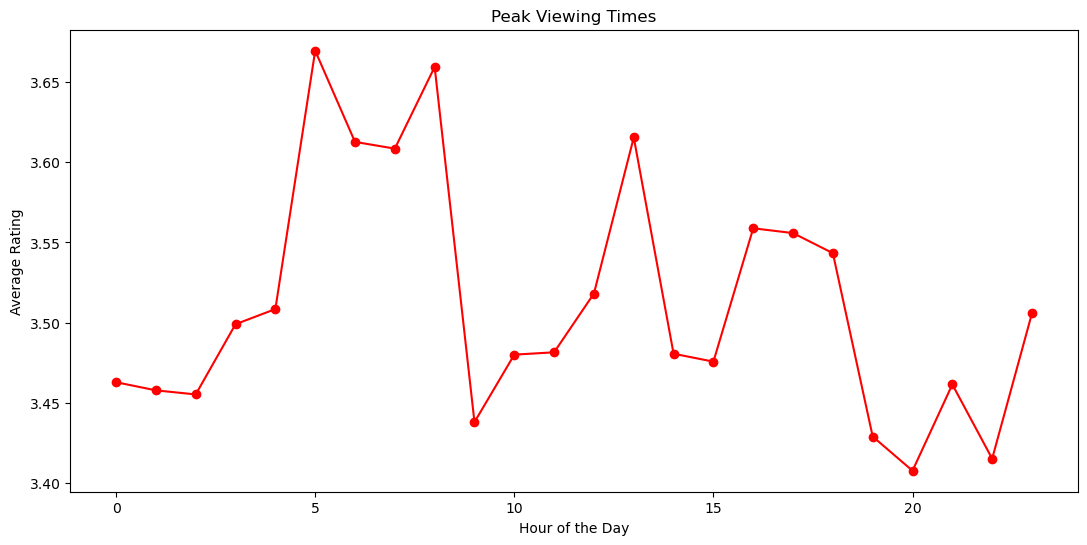

In [8]:
# Group by hour and calculate average rating
peak_viewing_times = data.groupby('hour')['rating'].mean()

# Plotting peak viewing time
plt.figure(figsize = (13, 6))
peak_viewing_times.plot(kind = 'line', marker = 'o', color = 'r', title = 'Peak Viewing Times')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Rating')
plt.show()


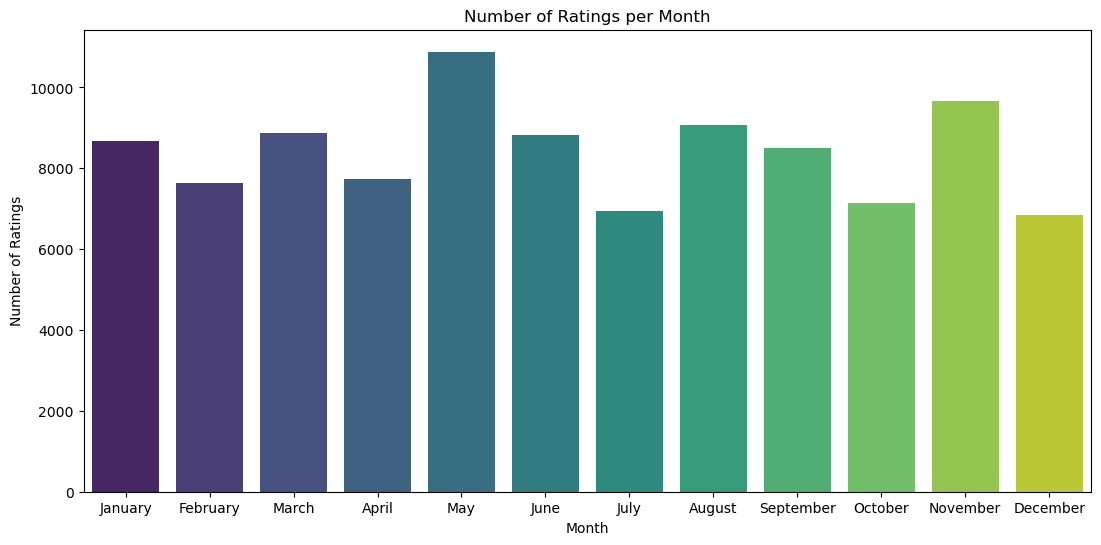

In [9]:
import calendar

data['month_name'] = data['month'].apply(lambda x: calendar.month_name[x])

# Define the order of months
month_order = list(calendar.month_name)[1:]

# Convert 'month_name' to categorical with the specified order
data['month_name'] = pd.Categorical(data['month_name'], categories=month_order, ordered=True)

# Group by month and calculate the number of ratings
monthly_ratings_count = data.groupby('month_name')['rating'].count()

# Plotting the number of ratings per month with seaborn
plt.figure(figsize=(13, 6))
sns.barplot(x=monthly_ratings_count.index, y=monthly_ratings_count.values, palette='viridis')
plt.title('Number of Ratings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Ratings')
plt.show()



In [10]:
# checking different genres value count.

def find_genres(data):
    """
    Find and count genres in a movies DataFrame.

    """
    genres = {}  # dictionary to store different genre values

    for genre in data['genres']:
        words = genre.split('|')
        for word in words:
            genres[word] = genres.get(word, 0) + 1

    return genres

# usage:
genre_count = find_genres(data)
genre_count

{'Adventure': 24161,
 'Animation': 6988,
 'Children': 9208,
 'Comedy': 39053,
 'Fantasy': 11834,
 'Romance': 18124,
 'Drama': 41928,
 'Action': 30635,
 'Crime': 16681,
 'Thriller': 26452,
 'Horror': 7291,
 'Mystery': 7674,
 'Sci-Fi': 17243,
 'War': 4859,
 'Musical': 4138,
 'Documentary': 1219,
 'IMAX': 4145,
 'Western': 1930,
 'Film-Noir': 870,
 '(no genres listed)': 47}

### visualization of top 5 genre and percentage ratio.

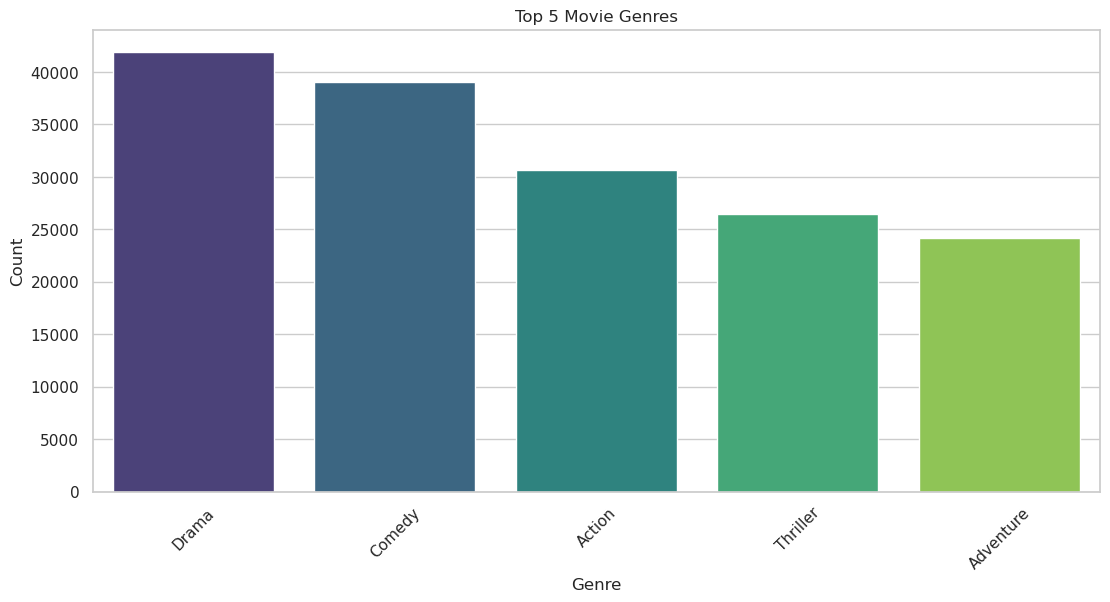

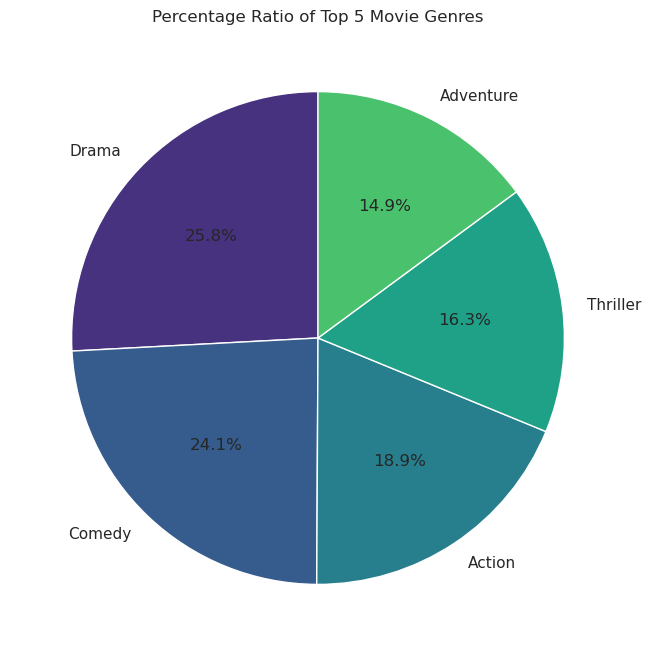

In [11]:
# visualization of top 5 genre and percentage ratio.

# Convert genre_count dictionary to a DataFrame
df_genre = pd.DataFrame(list(genre_count.items()), columns=['Genre', 'Count'])

# Sort DataFrame by Count in descending order
df_genre = df_genre.sort_values(by='Count', ascending=False)

# Select the top 5 genres
top5_genre = df_genre.head(5)


# Plotting
plt.figure(figsize=(13, 6))
sns.set(style="whitegrid")
sns.barplot(x='Genre', y='Count', data=top5_genre, palette="viridis")
plt.title('Top 5 Movie Genres')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

# Pie chart for percentage ratio
plt.figure(figsize=(15, 8))
plt.pie(top5_genre['Count'], labels = top5_genre['Genre'], autopct = '%1.1f%%', colors = sns.color_palette("viridis"), startangle = 90)
plt.title('Percentage Ratio of Top 5 Movie Genres')
plt.show()


### Top viewed movies.

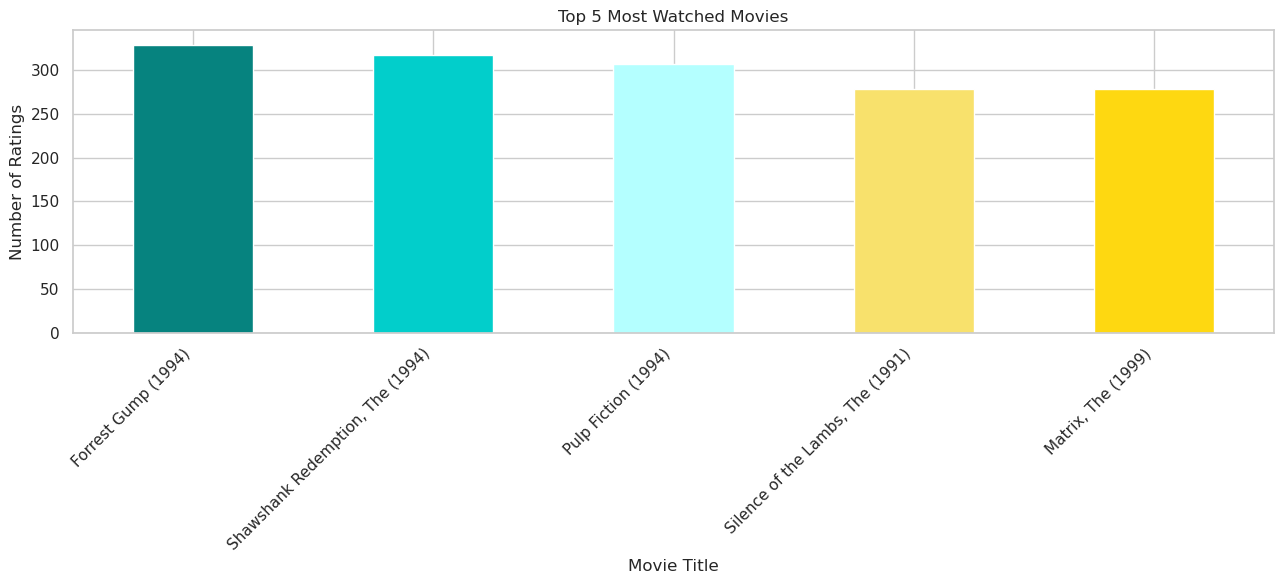

In [12]:
# Group by movie title and count the number of ratings, then sort in descending order
top_watched_movies = data.groupby('title')['rating'].count().sort_values(ascending=False).head()

# list of custom colors for the bars
custom_colors = ['#06837f', '#02cecb', '#b4ffff', '#f8e16c', '#fed811']

# bar plot to show top watched movies.
plt.figure(figsize=(13, 6))
ax = top_watched_movies.plot(kind='bar', color=custom_colors)
plt.title('Top 5 Most Watched Movies')
plt.xlabel('Movie Title')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

### visualization of high rated movies

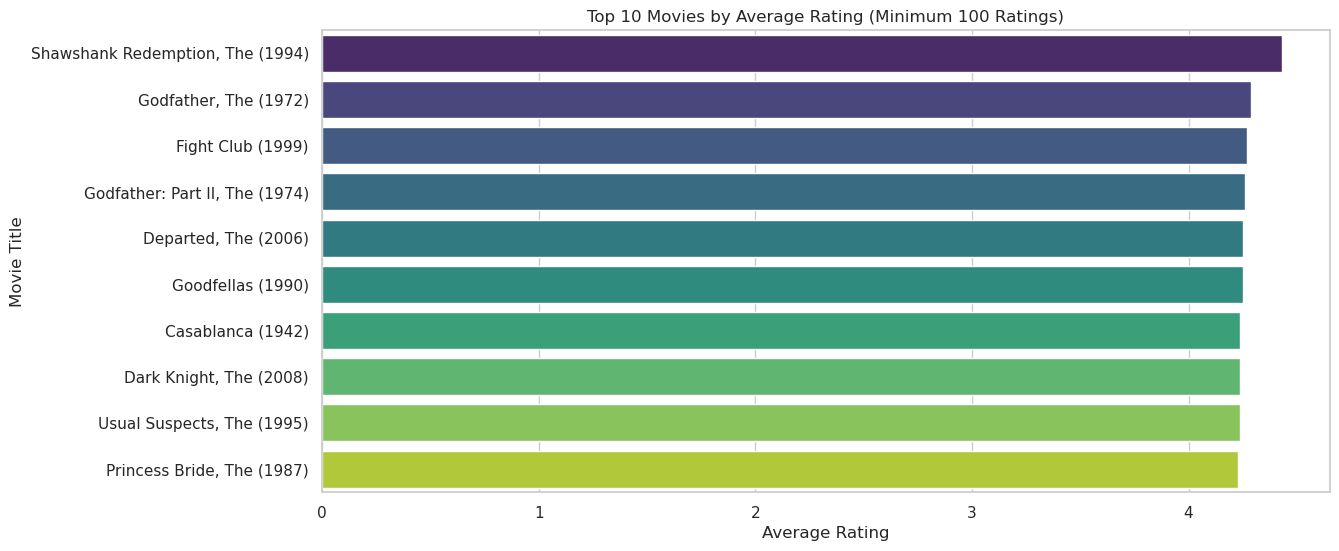

In [13]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Rename the columns for clarity
average_ratings.columns = ['title', 'avg_rating']

# Sort the movies by average rating in descending order
average_ratings = average_ratings.sort_values(by='avg_rating', ascending=False)

# bar plot to visualize the top 10 movies by average rating
plt.figure(figsize=(13, 6))
sns.barplot(x="avg_rating", y="title", data=round(average_ratings.head(10), 2), palette="viridis")
plt.title("Top 10 Movies by Average Rating (Minimum 100 Ratings)")
plt.xlabel("Average Rating")
plt.ylabel("Movie Title")
plt.show()


### Rating distribution

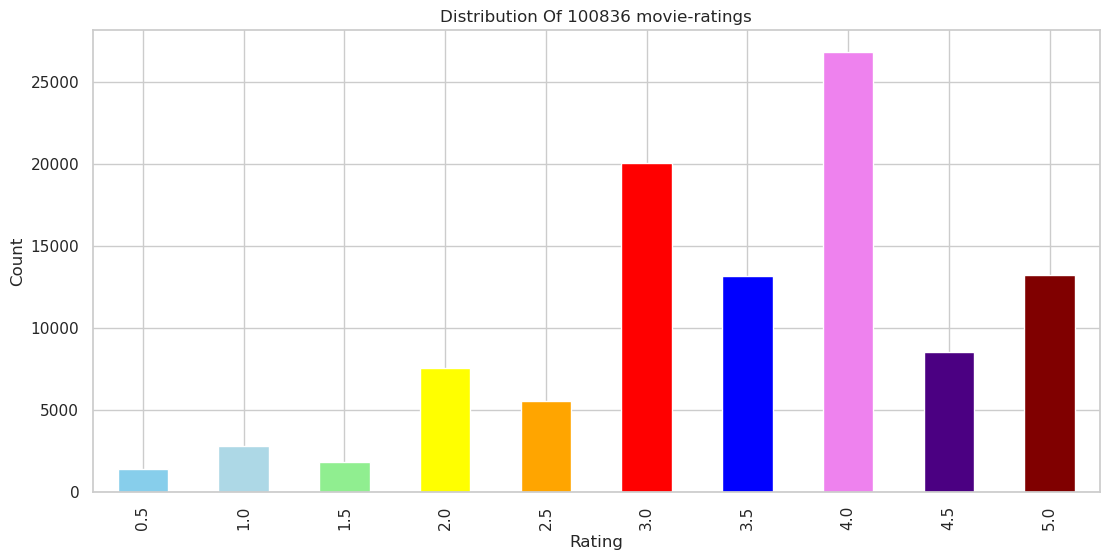

In [14]:
# count of each rating
rating_counts = data['rating'].value_counts().sort_index()

# colors for each bar
bar_colors = ['skyblue', 'lightblue', 'lightgreen', 'yellow', 'orange', 'red', 'blue', 'violet', 'indigo','maroon', 'green']

# bar graph
plt.figure(figsize=(13, 6))
ax = rating_counts.plot(kind='bar', color=bar_colors)
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
ax.set_title('Distribution Of {} movie-ratings'.format(data.shape[0]))
plt.show()

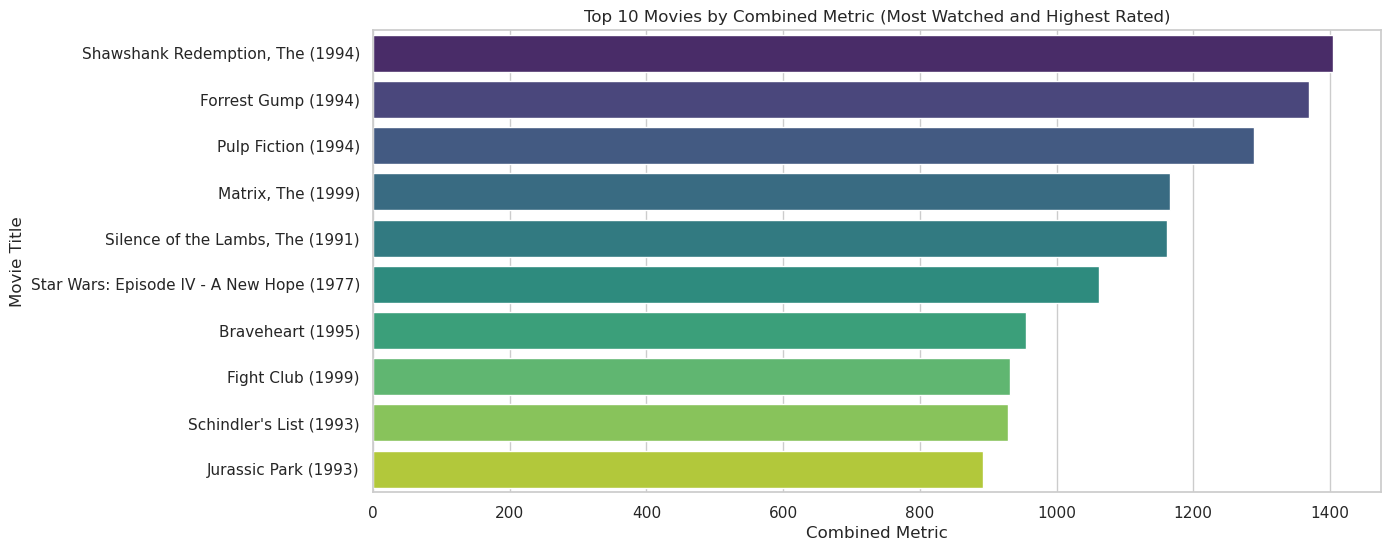

In [15]:
# Count the number of ratings for each movie
movie_ratings_count = data.groupby('title')['userId'].count().reset_index(name='num_ratings')

# Filter movies with at least a hundred ratings
popular_movies = movie_ratings_count[movie_ratings_count['num_ratings'] >= 100]

# Merge the original data with the filtered popular movies
filtered_data = pd.merge(data, popular_movies, on='title', how='inner')

# Calculate average ratings for each movie
average_ratings = filtered_data.groupby('title')['rating'].mean().reset_index()

# Calculate a combined metric (e.g., weighted sum of average rating and log-transformed number of ratings)
filtered_data['combined_metric'] = filtered_data['rating'] * (filtered_data['num_ratings'].apply(lambda x: min(1, x / 100)))  # Adjust the weight as needed

# Sort the movies by the combined metric in descending order
sorted_movies = filtered_data.groupby('title')['combined_metric'].sum().reset_index()
sorted_movies = sorted_movies.sort_values(by='combined_metric', ascending=False)

# bar plot to visualize the top 10 movies by the combined metric
plt.figure(figsize=(13, 6))
sns.barplot(x="combined_metric", y="title", data=sorted_movies.head(10), palette="viridis")
plt.title("Top 10 Movies by Combined Metric (Most Watched and Highest Rated)")
plt.xlabel("Combined Metric")
plt.ylabel("Movie Title")
plt.show()


###  __Collaborative Filtering__

In [16]:
from surprise.prediction_algorithms import SVD
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import knns
from surprise.similarities import cosine, msd, pearson
from surprise import accuracy 
from surprise import Reader, Dataset, SVD
from surprise.model_selection import train_test_split, cross_validate
import random
from scipy.sparse import csr_matrix

In [17]:
# First lets create a Pivot matrix
rating = pd.read_csv('./data/ratings.csv')
movies = pd.read_csv('./data/movies.csv')

data = pd.merge(rating, movies,  on='movieId')
data.info()


pivot_table = data.pivot_table(index='title',columns='userId',values='rating').fillna(0)
pivot_table.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 6 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
 4   title      100836 non-null  object 
 5   genres     100836 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 5.4+ MB


userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
user_matrix = pivot_table.copy()

user_matrix.corr()

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
userId,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.019396,0.053052,0.176911,0.120862,0.104406,0.143785,0.128542,0.055263,-0.000307,...,0.066248,0.149934,0.186959,0.056523,0.134402,0.121958,0.254192,0.262225,0.085430,0.098693
2,0.019396,1.000000,-0.002595,-0.003808,0.013181,0.016252,0.021564,0.023748,-0.003450,0.061877,...,0.198547,0.010885,-0.004038,-0.005348,-0.007923,0.011290,0.005809,0.032723,0.024371,0.089321
3,0.053052,-0.002595,1.000000,-0.004559,0.001886,-0.004581,-0.005637,0.001701,-0.003112,-0.005504,...,0.000148,-0.000588,0.011203,-0.004824,0.003674,-0.003255,0.012881,0.008089,-0.002964,0.015953
4,0.176911,-0.003808,-0.004559,1.000000,0.121014,0.065707,0.100595,0.054231,0.002412,0.015607,...,0.072841,0.114280,0.281852,0.039692,0.065483,0.164812,0.115109,0.116843,0.023926,0.062498
5,0.120862,0.013181,0.001886,0.121014,1.000000,0.294134,0.101721,0.426575,-0.004187,0.023468,...,0.061908,0.414929,0.095386,0.254115,0.141073,0.090149,0.145760,0.122600,0.258288,0.040361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
606,0.121958,0.011290,-0.003255,0.164812,0.090149,0.047476,0.172484,0.081904,0.057979,0.054858,...,0.153879,0.084190,0.224593,0.035234,0.106729,1.000000,0.115978,0.188312,0.052375,0.093788
607,0.254192,0.005809,0.012881,0.115109,0.145760,0.142158,0.173287,0.178130,0.003252,-0.004817,...,0.080027,0.187581,0.173008,0.126261,0.101129,0.115978,1.000000,0.258232,0.142529,0.098496
608,0.262225,0.032723,0.008089,0.116843,0.122600,0.137932,0.305429,0.175906,0.086221,0.048357,...,0.136304,0.174056,0.164440,0.133722,0.144878,0.188312,0.258232,1.000000,0.109556,0.248902


In [20]:
user_corr = user_matrix.T.corr()

target_user = 5.0

user_target = user_corr[target_user]

user_target.head()

KeyError: 5.0

In [ ]:
target_user = 5.0

user_target = user_corr[target_user]

user_target.head()

In [84]:
import implicit
import numpy as np
import pandas as pd
from scipy.sparse import coo_matrix
# # Create a sparse user-item matrix
# sparse_matrix = coo_matrix((data['movieId'], (data['userId'], data['rating'])))

#create a sparse matrix
sparse_matrix = csr_matrix(pivot_table.values)

# Train the ALS model
model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=50)
model.fit(sparse_matrix.T)  # Transpose the matrix for item-based recommendations
user_id = 1
recommendations = model.recommend(user_id, sparse_matrix, N=5)
item_factors = model.item_factor

/home/marwa254/anaconda3/lib/python3.11/site-packages/implicit/cpu/als.py:95: RuntimeWarning: Intel MKL BLAS is configured to use 2 threads. It is highly recommended to disable its internal threadpool by setting the environment variable 'MKL_NUM_THREADS=1' or by callng 'threadpoolctl.threadpool_limits(1, "blas")'. Having MKL use a threadpool can lead to severe performance issues
  check_blas_config()
/home/marwa254/anaconda3/lib/python3.11/site-packages/implicit/utils.py:164: ParameterWarning: Method expects CSR input, and was passed csc_matrix instead. Converting to CSR took 0.002701282501220703 seconds
  warnings.warn(


  0%|          | 0/50 [00:00<?, ?it/s]

ValueError: user_items must contain 1 row for every user in userids

In [71]:
random_seed = 42

#initialise svd
svd = SVD()

random.seed(random_seed)

results = cross_validate(svd, data, measures=['rmse', 'mae'], cv=5, verbose=True)

print(results)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8855  0.8810  0.8765  0.8699  0.8751  0.8776  0.0053  
MAE (testset)     0.6807  0.6765  0.6745  0.6679  0.6752  0.6750  0.0042  
Fit time          3.18    2.82    2.86    2.68    2.70    2.85    0.18    
Test time         0.48    0.55    0.42    0.35    0.65    0.49    0.11    
{'test_rmse': array([0.88548803, 0.88097668, 0.87651533, 0.86986777, 0.87511382]), 'test_mae': array([0.68074113, 0.67649896, 0.6745034 , 0.66788304, 0.67519925]), 'fit_time': (3.178816318511963, 2.818441152572632, 2.864043712615967, 2.679507255554199, 2.6997787952423096), 'test_time': (0.4757108688354492, 0.5460076332092285, 0.41921019554138184, 0.3461720943450928, 0.6540787220001221)}


In [ ]:
# import implicit
# import numpy as np
# import pandas as pd
# from scipy.sparse import coo_matrix
# # Create a sparse user-item matrix
# sparse_matrix = coo_matrix((data['movieId'], (data['userId'], data['rating'])))

# # Train the ALS model
# model = implicit.als.AlternatingLeastSquares(factors=50, regularization=0.1, iterations=50)
# model.fit(sparse_matrix.T)  # Transpose the matrix for item-based recommendations
# user_id = 1
# recommendations = model.recommend(user_id, sparse_matrix, N=5)
# item_factors = model.item_factor

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100836 entries, 0 to 100835
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   movieId     100836 non-null  int64         
 1   title       100836 non-null  object        
 2   genres      100836 non-null  object        
 3   userId      100836 non-null  int64         
 4   rating      100836 non-null  float64       
 5   timestamp   100836 non-null  datetime64[ns]
 6   hour        100836 non-null  int64         
 7   month       100836 non-null  int64         
 8   month_name  100836 non-null  category      
dtypes: category(1), datetime64[ns](1), float64(1), int64(4), object(2)
memory usage: 7.0+ MB


In [57]:
reader = Reader(rating_scale=(0.5, 5))



In [58]:
data.head()

,movieId,title,genres,userId,rating,timestamp,hour,month,month_name
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,2000-07-30 18:45:03,18,7,July
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,1996-11-08 06:36:02,6,11,November
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,2005-01-25 06:52:26,6,1,January
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,2017-11-13 12:59:30,12,11,November
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,2011-05-18 05:28:03,5,5,May


In [59]:
data = Dataset.load_from_df(data[['movieId', 'userId', 'rating']], reader)

In [60]:
type(data)

surprise.dataset.DatasetAutoFolds

In [61]:
svd = SVD()


In [62]:
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)
print("Number of users: ", trainset.n_users, "\n")
print("Number of items: ", trainset.n_items, "\n")
sim_cos = {"name": "cosine", "user_based": False}
basic = knns.KNNBasic(sim_options=sim_cos)
basic.fit(trainset)
predictions = basic.test(testset)
print(accuracy.rmse(predictions))

Number of users:  9007 

Number of items:  610 

Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.9669
0.9668763383092234


In [63]:
sim_pearson = {"name": "pearson", "user_based": False}
basic_pearson = knns.KNNBasic(sim_options=sim_pearson)
basic_pearson.fit(trainset)
predictions = basic_pearson.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.9701
0.9700778595183002


In [64]:
sim_pearson = {"name": "pearson", "user_based": False}
knn_means = knns.KNNWithMeans(sim_options=sim_pearson)
knn_means.fit(trainset)
predictions = knn_means.test(testset)
print(accuracy.rmse(predictions))

Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8929
0.892930931497463


In [65]:
sim_pearson = {"name": "pearson", "user_based": False}
knn_baseline = knns.KNNBaseline(sim_options=sim_pearson)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.8744
0.8743580675346079


In [66]:
sim_cosine = {"name": "cosine", "user_based": False}
knn_baseline = knns.KNNBaseline(sim_options=sim_cosine)
knn_baseline.fit(trainset)
predictions = knn_baseline.test(testset)
print(accuracy.rmse(predictions))

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
RMSE: 0.8752
0.8751607148945946


In [67]:
params = {'n_factors': [20, 50, 100],'reg_all': [0.02, 0.05, 0.1]}
g_s_svd = GridSearchCV(SVD, param_grid = params, n_jobs = -1)
g_s_svd.fit(data)
print(g_s_svd.best_score)
print(g_s_svd.best_params)

0.07s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
2702.22s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.00s - Debugger warning: It seems that frozen modules are being used, which may
0.00s - make the debugger miss breakpoints. Please pass -Xfrozen_modules=off
0.00s - to python to disable frozen modules.
0.00s - Note: Debugging will proceed. Set PYDEVD_DISABLE_FILE_VALIDATION=1 to disable this validation.
2702.85s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2703.05s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
2703.20s - pydevd: Sending message related to process being replaced timed-out after 5 seconds
0.03s - 

{'rmse': 0.8735964068362563, 'mae': 0.672359625972498}
{'rmse': {'n_factors': 100, 'reg_all': 0.05}, 'mae': {'n_factors': 100, 'reg_all': 0.05}}


In [68]:
svd = SVD(n_factors=100, n_epochs=10, lr_all=0.005, reg_all=0.05)
svd.fit(trainset)
predictions = svd.test(testset)
print(accuracy.rmse(predictions))

RMSE: 0.8824
0.8824138497332206


In [69]:
from  surprise.model_selection.validation import cross_validate

cross_validate(knn_baseline, data, measures=['rmse', 'mae'])

Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the cosine similarity matrix...
Done computing similarity matrix.


KeyboardInterrupt: 